In [ ]:
# Author : Anish Joshi

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
data=pd.read_csv("day.csv")
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [71]:
data.shape

(730, 16)

In [72]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [73]:
# We can drop the columns: instant, dteday
# dropping instant because it is just the record number
# dropping dteday because we already have the yr and month with us
data=data.drop('instant',axis=1)
data=data.drop('dteday',axis=1)
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


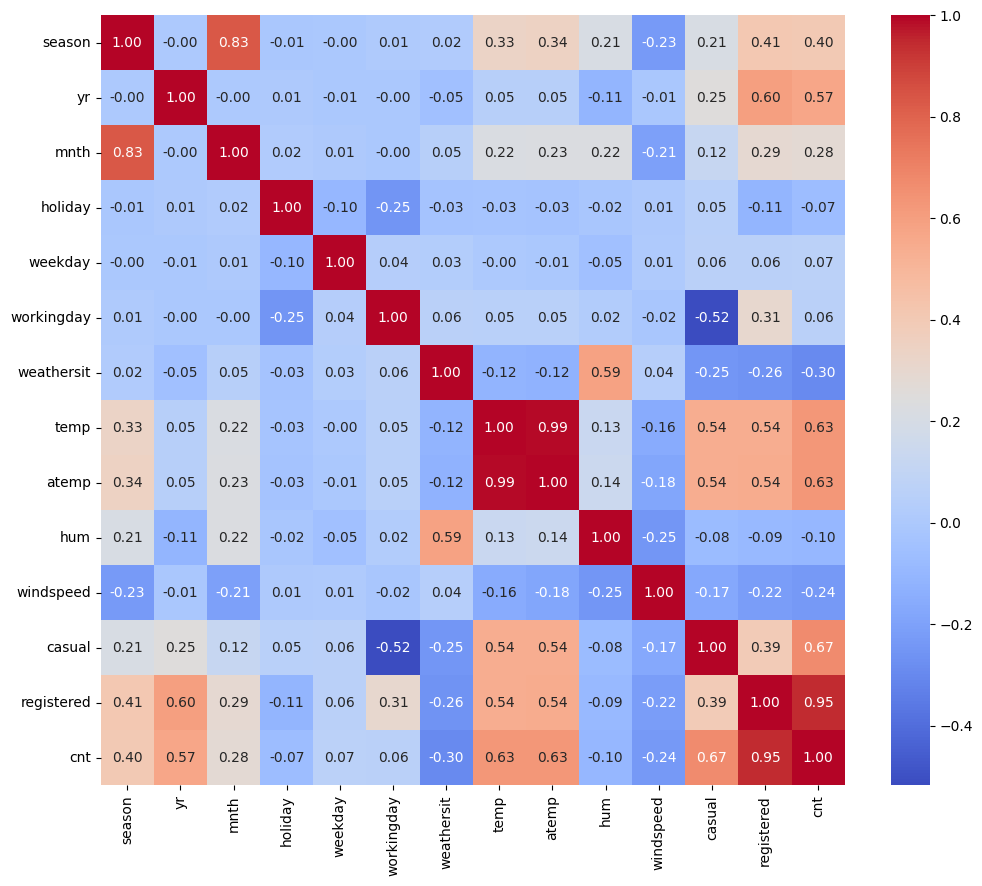

In [75]:
corr_matrix=data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [76]:
#dropping atemp since it is highly correlated with temp
# dropping casual and registered since they are a part of the target variable and hence are highly correlated
data=data.drop('atemp',axis=1)
data=data.drop('casual',axis=1)
data=data.drop('registered',axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


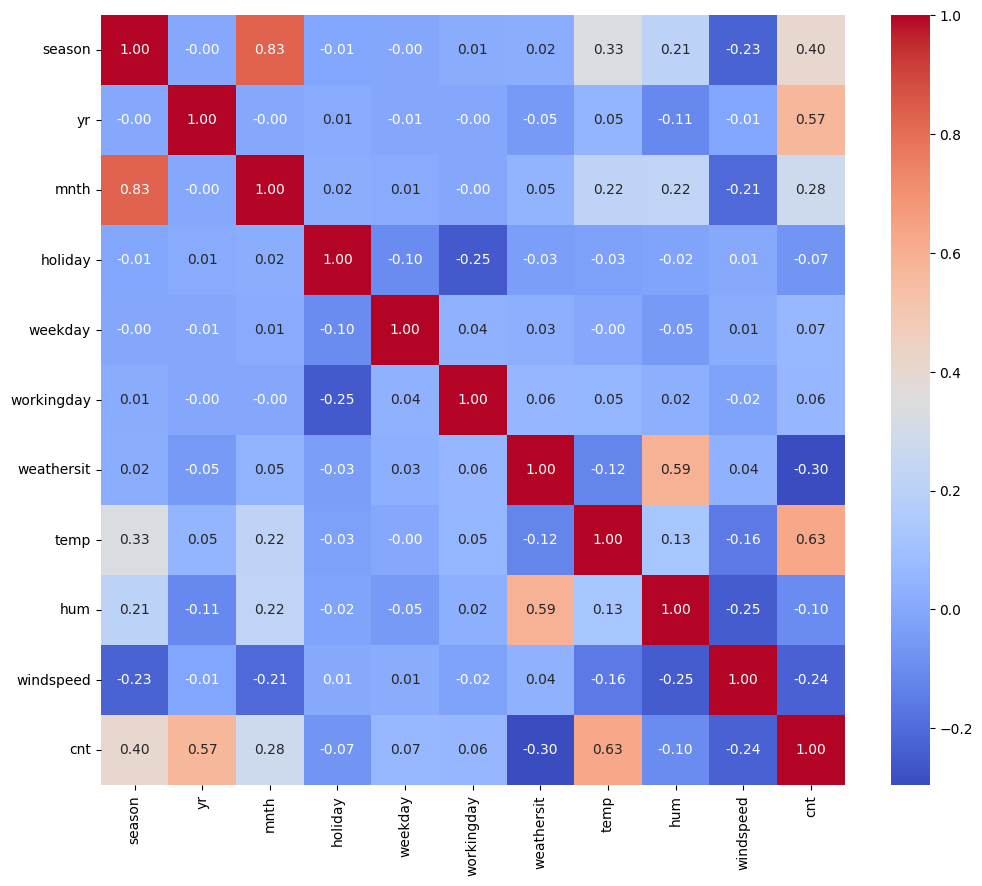

In [78]:
corr_matrix=data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [79]:
# Dealing with categorical variables
data['season']=data['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})
data['mnth']=data['mnth'].map({1:"jan",2:"feb",3:"mar",4:"april",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})
data['weekday']=data['weekday'].map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat",7:"sun"})
data['weathersit']=data['weathersit'].map({1:"A",2:"B",3:"C",4:"D"})

In [80]:
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,B,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,B,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,A,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,A,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,A,9.305237,43.6957,12.522300,1600


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


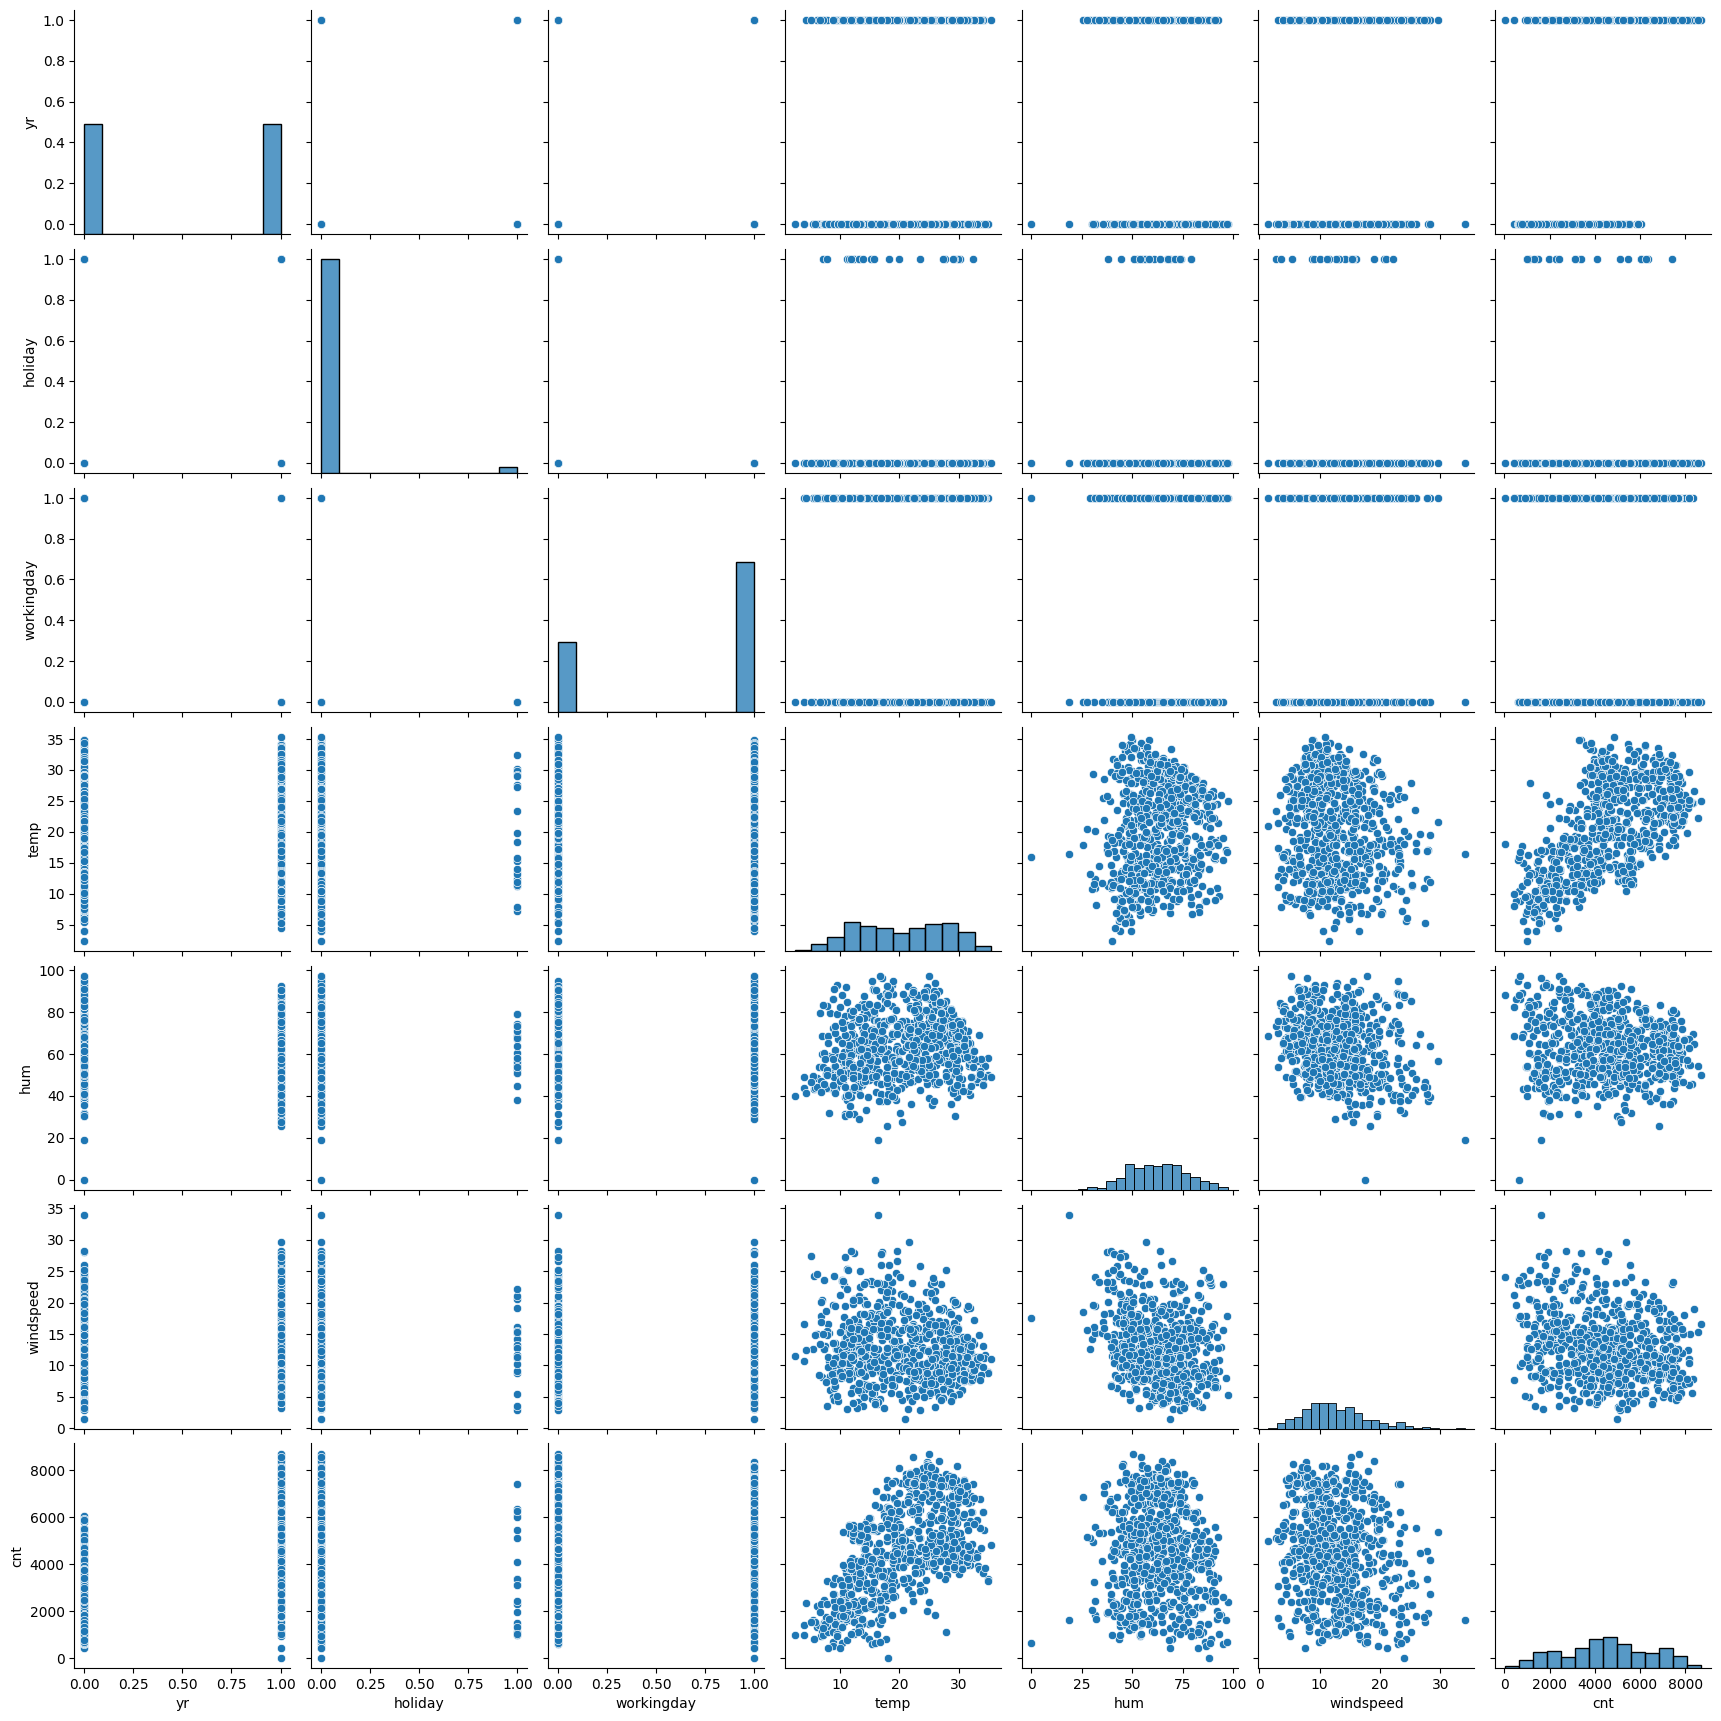

In [82]:
sns.pairplot(data)
plt.show()

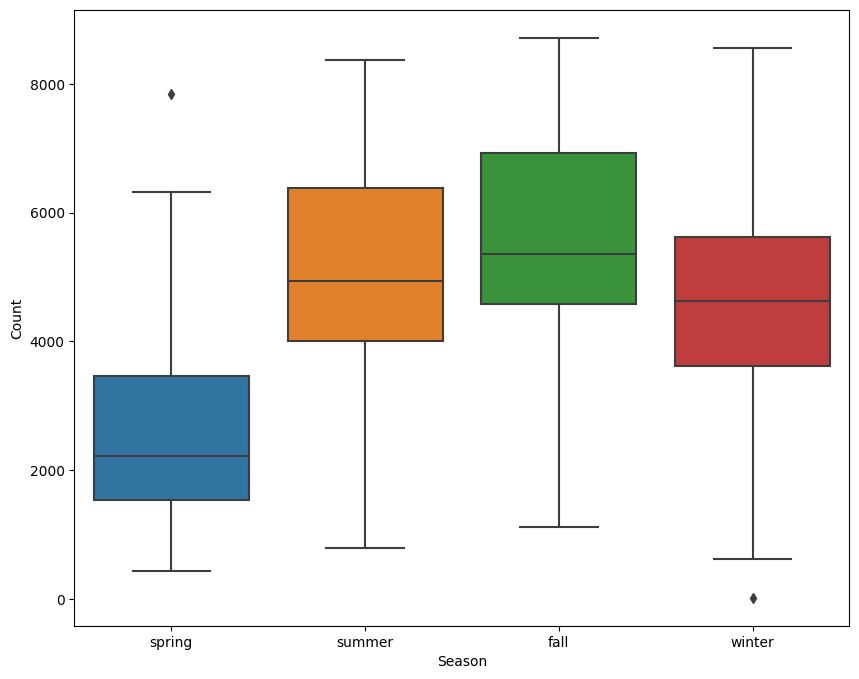

In [83]:
#visualizing the categorical variables
plt.figure(figsize=(10, 8))
sns.boxplot(x='season', y='cnt', data=data)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

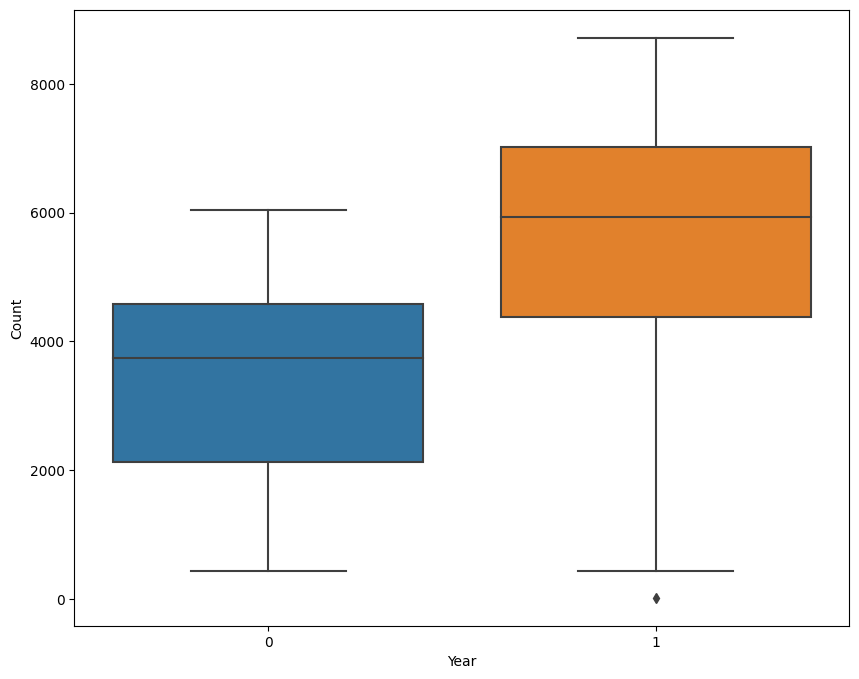

In [84]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='yr', y='cnt', data=data)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

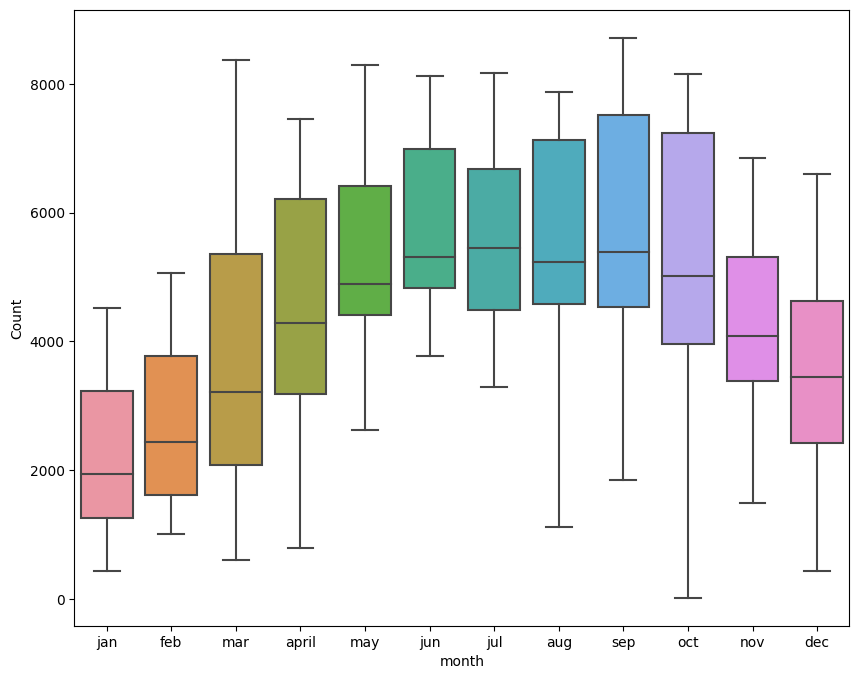

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='mnth', y='cnt', data=data)
plt.xlabel('month')
plt.ylabel('Count')
plt.show()

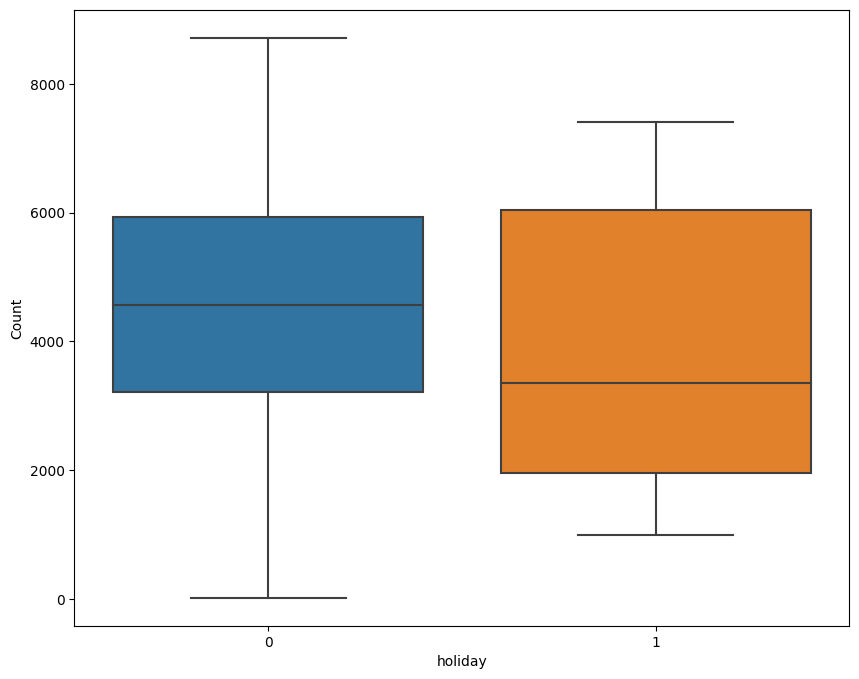

In [86]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='holiday', y='cnt', data=data)
plt.xlabel('holiday')
plt.ylabel('Count')
plt.show()

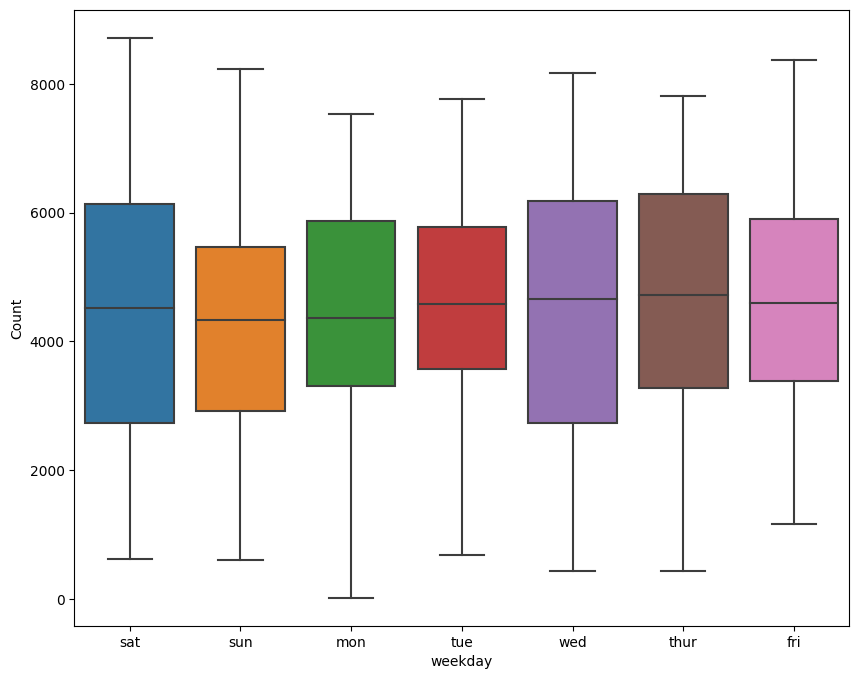

In [87]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='weekday', y='cnt', data=data)
plt.xlabel('weekday')
plt.ylabel('Count')
plt.show()

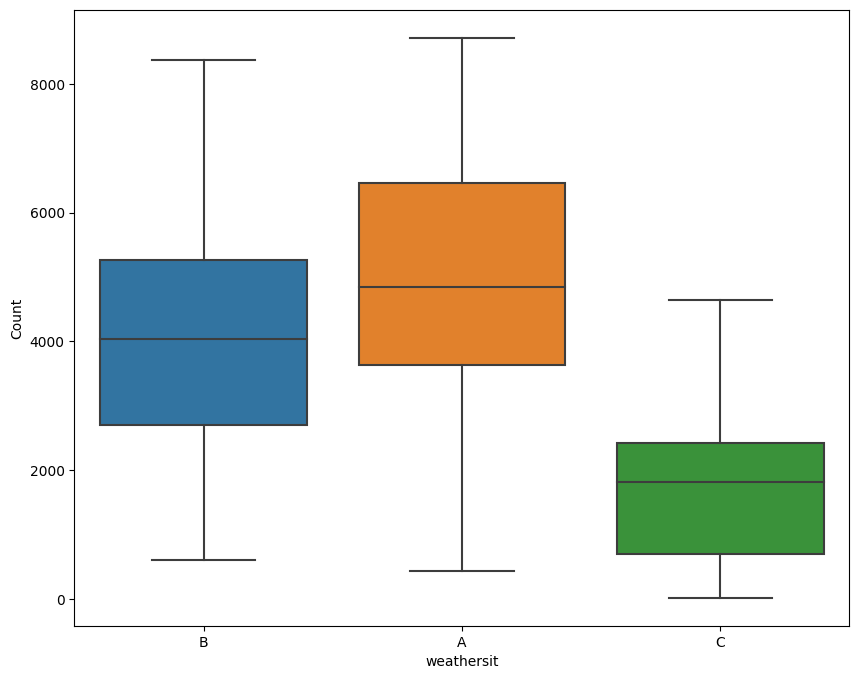

In [88]:
# A: Clear, Few clouds, Partly cloudy, Partly cloudy
# B: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# C: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# D: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
plt.figure(figsize=(10, 8))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.xlabel('weathersit')
plt.ylabel('Count')
plt.show()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [115]:
#Now creating dummy variables for each of the categorical variables.
# It is easy for a model to interpret 0 or 1 instead of 1,2,3,4
columns_to_encode = ['season','mnth','weekday','weathersit']
data1=pd.get_dummies(data=data,columns=columns_to_encode,dtype=int,drop_first=True)
data1.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [116]:
data1.shape

(730, 29)

In [117]:
y=data1.pop('cnt')
X=data1

In [118]:
pip install statsmodel

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
Note: you may need to restart the kernel to use updated packages.


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)

In [121]:
#Scaling the numerical features
scaler=MinMaxScaler()
nums_features=['temp','hum','windspeed']
X_train[nums_features]=scaler.fit_transform(X_train[nums_features])
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.400324,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
668,1,0,1,0.371783,0.686990,0.361366,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
694,1,0,1,0.316749,0.551739,0.060760,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.567625,0.336444,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
18,0,0,1,0.290384,0.764351,0.465686,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [122]:
# Now we will start building our linear regression model
# Firstly, we will use RFE i.e. the Recurrsive Feature Elimination in order to get the top 12 features
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [123]:
rfe=RFE(lr_model,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [124]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 17),
 ('season_winter', False, 3),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 15),
 ('mnth_jan', False, 12),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 18),
 ('mnth_mar', False, 8),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 10),
 ('mnth_sep', False, 6),
 ('weekday_mon', False, 13),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thur', False, 16),
 ('weekday_tue', False, 19),
 ('weekday_wed', False, 14),
 ('weathersit_B', False, 7),
 ('weathersit_C', True, 1)]

In [125]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'weekday_sat', 'weekday_sun', 'weathersit_C'],
      dtype='object')

In [126]:
main_cols=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'weekday_sat', 'weekday_sun', 'weathersit_C']
X_train_sm=sm.add_constant(X_train[main_cols])
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

new_df=X_train[main_cols]
vif=pd.DataFrame()
vif['features']=new_df.columns
vif['VIF']=[variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     246.7
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          2.31e-184
Time:                        14:58:36   Log-Likelihood:                -4469.7
No. Observations:                 547   AIC:                             8959.
Df Residuals:                     537   BIC:                             9002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3002.6361    214.560     13.994

In [127]:
# By the above OLS model with 10 features, we get a decent model with almost all features statiscally significant
# based on the p-values
# When we calculate the VIF, we see that the feature 'workingday' is showing high VIF i.e. high multicollinearity
# We build another model by removing 'workingday'

In [128]:
main_cols=['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'weekday_sat', 'weekday_sun', 'weathersit_C']
X_train_sm=sm.add_constant(X_train[main_cols])
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

new_df=X_train[main_cols]
vif=pd.DataFrame()
vif['features']=new_df.columns
vif['VIF']=[variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     246.7
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          2.31e-184
Time:                        15:01:44   Log-Likelihood:                -4469.7
No. Observations:                 547   AIC:                             8959.
Df Residuals:                     537   BIC:                             9002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4020.9704    267.990     15.004

In [129]:
# By the above OLS model with 10 features, we get a decent model with almost all features statiscally significant
# based on the p-values
# When we calculate the VIF, we see that the feature 'hum' is showing high VIF i.e. high multicollinearity
# We build another model by removing 'hum'

In [131]:
main_cols=['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'weekday_sat', 'weekday_sun', 'weathersit_C']
X_train_sm=sm.add_constant(X_train[main_cols])
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

new_df=X_train[main_cols]
vif=pd.DataFrame()
vif['features']=new_df.columns
vif['VIF']=[variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     250.6
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          5.66e-176
Time:                        15:03:00   Log-Likelihood:                -4492.3
No. Observations:                 547   AIC:                             9003.
Df Residuals:                     538   BIC:                             9041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2639.0897    181.931     14.506

In [132]:
# the feature 'weekday_sat' has p-value greather than 0.05 making it statistically significant
# let's remove the feature and see the effect on the r2 score

In [133]:
main_cols=['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'weekday_sun', 'weathersit_C']
X_train_sm=sm.add_constant(X_train[main_cols])
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

new_df=X_train[main_cols]
vif=pd.DataFrame()
vif['features']=new_df.columns
vif['VIF']=[variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     286.9
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          3.33e-177
Time:                        15:05:13   Log-Likelihood:                -4492.3
No. Observations:                 547   AIC:                             9001.
Df Residuals:                     539   BIC:                             9035.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2645.0922    180.222     14.677

In [134]:
# The R2 score is the same as before. however now we can see that we got all the significant features for our model
# The VIFs for all the features are less than 5, hence multicollinearity is minimal
# Now, we will build a final LinearRegression model using sklearn with the above significant features

In [135]:
chosen_features=['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'weekday_sun', 'weathersit_C']
X_train_final=X_train[chosen_features]

In [136]:
regression_model=LinearRegression()
regression_model.fit(X_train_final,y_train)

LinearRegression()

In [137]:
# Now let's see the slopes i.e. beta0, beta1, beta2, etc values and the intercept
# coefficients
regression_model.coef_

array([ 2032.40229602,  -713.91554867,  3112.3020647 ,  -914.26914304,
       -1523.12960308,  -353.74220016, -1946.71689023])

In [138]:
# the intercept
regression_model.intercept_

2645.0921912697113

In [140]:
# Now let's plot the regression line our training data
y_train_pred=regression_model.predict(X_train_final)

<Axes: ylabel='cnt'>

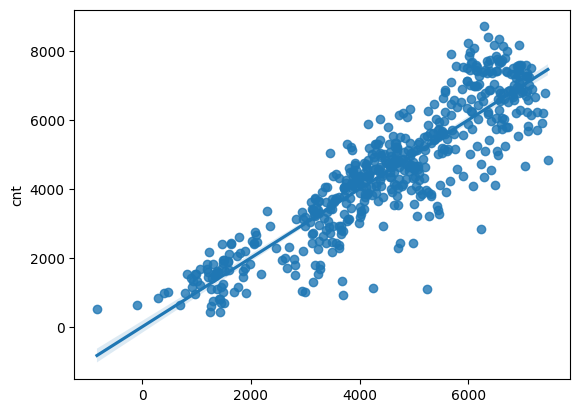

In [142]:
sns.regplot(x=y_train_pred, y=y_train)

In [145]:
# Let's check the R2 score on the training data
r2_score_train=r2_score(y_train,y_train_pred)
print("R2 score on training data:",r2_score_train)

R2 score on training data: 0.7884162539989736


In [146]:
# Now, we will check whether our model holds the assumptions of Linear regression
# The following are the assumptions:
# 1. Linear relationship between the input features and the output target variable
# 2. Multicollinearity (using variance inflation factor)
# 3. Normal residuals (using kde plot)
# 4. Homoscadisity
# 5. No autocorrelation of errors(residuals)

In [147]:
# We have already checked the first two assumptions above while data preprocessing and building our model

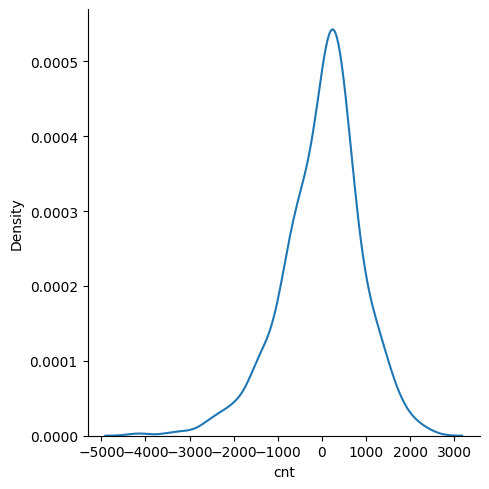

In [148]:
# Normal residuals
# Plotting a kde plot to see the normal distribution of residuals
residuals=y_train-y_train_pred
sns.displot(residuals,kind='kde')

In [149]:
# We can see from the above plot that the assumption of normal distrbution of residuals holds

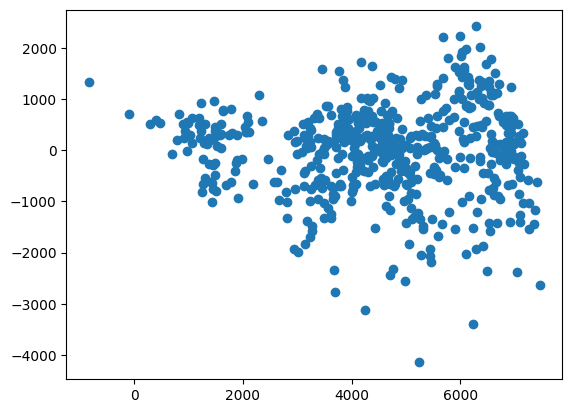

In [150]:
# Now, we will check for homoscadisity
plt.scatter(y_train_pred,residuals)

In [151]:
# Our model decently holds the assumption of homoscadisity

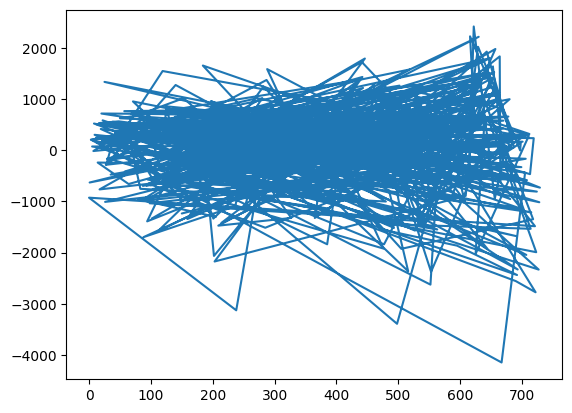

In [153]:
# No autocorrelation of residuals
# There should be no positive autocorrelation
# There are two methos to check this assumption
# using durbin-watson test or by plotting the residuals
# First we will plot the residuals
plt.plot(residuals)

In [155]:
# It does not hold any particular pattern so no auto correlation
# lets confirm using durbin-watson test
# If the value is close to 2, there is no autocorrelation of residuals
# If the value is less than 2, then there is positive autocorrelation
# If the value is greater than 2, then there is negative autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_results=durbin_watson(residuals)
print("result:",dw_results)

result: 2.02821247462104


In [156]:
# No autocorrelation of residuals so the assumption holds

In [157]:
# Now,predicting on the test data
X_test[nums_features]=scaler.transform(X_test[nums_features])

In [158]:
X_test_final=X_test[chosen_features]
y_pred=regression_model.predict(X_test_final)

<Axes: ylabel='cnt'>

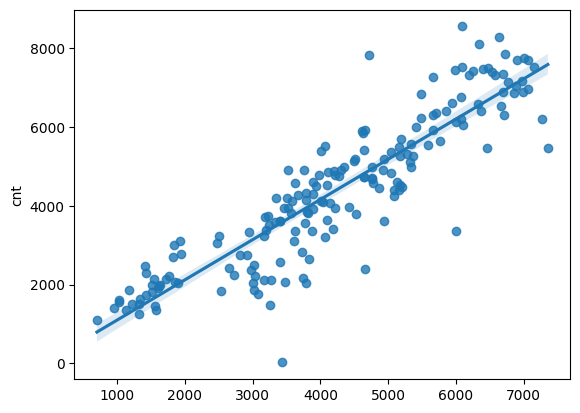

In [162]:
# Finding the best fit line
sns.regplot(x=y_pred, y=y_test)

In [163]:
r2_score_test=r2_score(y_test,y_pred)
print("R2 score on the test data:",r2_score_test)

R2 score on the test data: 0.7959420032001923


In [164]:
# We have a R2 score of 0.788 on the training data and a R2 score of 0.795 on the test data
# Our model is performing well on unseen data as well

In [165]:
# Let's have a look at the coefficients of each feature
coefficients = pd.DataFrame({"features": chosen_features, "coefficients": regression_model.coef_})
coefficients.sort_values(by = 'coefficients',ascending = False)

,features,coefficients
2,temp,3112.302065
0,yr,2032.402296
5,weekday_sun,-353.742200
1,holiday,-713.915549
3,windspeed,-914.269143
4,season_spring,-1523.129603
6,weathersit_C,-1946.716890


In [166]:
# temp and yr contribute positively towards the demand of the bikes
# weekday_sun, holiday, windspeed, season_spring and weathersit_C contribute negatively towards the demands of bikes

The Linear Regression equation is as follows:
Y(cnt) = 2645.092 + 3112.302(temp) + 2032.402(yr) + (-353.742)(weekday_sun) + (-713.915)(holiday) + (-914.269)(windspeed) + (-1523.129)(season_spring) + (-1946.716)(weathersit_C)